# Segmenting and Clustering Neighborhoods in Toronto

This notebook is used to :
1. Scrape the [Wikipedia page](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) which provides postal code of each neighborhood along with the borough name and neighborhood name and wrangle the data, clean it, and then read it into a pandas  dataframe.
2. Get the latitude and the longitude coordinates of each neighborhood using Geocoder Python package.
3. Explore and cluster the neighborhoods in Toronto using k-means algorithm.

## Table of Contents



1. Download, Clean and Explore Dataset

2.  Obtain Coordinates of Each Neighborhood.

3.  Segment and Cluster Neighborhoods



Importing necessary packages and dependencies.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
from pandas import json_normalize # tranform JSON file into a pandas dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

     |████████████████████████████████| 94 kB 3.9 MB/s  eta 0:00:01


## 1. Download, Clean and Explore Dataset

Downloading the data from given url into a pandas dataframe.

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df_list = pd.read_html(url)

df_list contains list of all tables in the webpage denoted by the url

In [3]:
len(df_list)

3

In [4]:
df_list[0]

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [5]:
postal_code_dataframe = df_list[0]
postal_code_dataframe.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [6]:
postal_code_dataframe.shape

(180, 3)

Inorder to drop rows with a 'Borough' that is 'Not assigned', first check the value counts. Then drop rows using drop() function.

In [7]:
postal_code_dataframe['Borough'].value_counts()

Not assigned        77
North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
East York            5
East Toronto         5
York                 5
Mississauga          1
Name: Borough, dtype: int64

In [8]:
postal_code_dataframe.drop(postal_code_dataframe[postal_code_dataframe['Borough'] == 'Not assigned'].index, axis = 0, inplace = True)
postal_code_dataframe.reset_index(drop=True, inplace=True)
postal_code_dataframe['Borough'].value_counts()

North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
East Toronto         5
East York            5
York                 5
Mississauga          1
Name: Borough, dtype: int64

Checking if there are any data points which has a borough but a Not assigned  neighborhood.

In [9]:
postal_code_dataframe[postal_code_dataframe['Neighbourhood'] == 'Not assigned']

,Postal Code,Borough,Neighbourhood


Since there are no such data points we can proceed further without making any additional changes. Checking the dimensions of the dataframe before proceeding.

In [10]:
postal_code_dataframe.shape

(103, 3)

<h2 id="#item2">2. Obtain Coordinates of Each Neighborhood.</h2>

Reading geographical coordinates of the neighbourhoods from Geospatial_Coordinates.csv file

In [11]:
# The code was removed by Watson Studio for sharing.

In [12]:
coordinates_data = pd.read_csv(body)
coordinates_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Merge the postal_code_dataframe (which has data of postal code, borough and neighborhood) with coordinates_data(which has data of postal code, lattitude and longitude associated with each postal code.

In [13]:
postal_code_dataframe = postal_code_dataframe.join(coordinates_data.set_index('Postal Code'), on='Postal Code')
postal_code_dataframe.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


## 3. Segment and Cluster Neighborhoods

Using geopy library to get the latitude and longitude values of Toronto, Canada.

In [14]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


Creating a map of Toronto with neighborhoods superimposed on top.

In [15]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(postal_code_dataframe['Latitude'], postal_code_dataframe['Longitude'], postal_code_dataframe['Borough'], postal_code_dataframe['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Filter the dataframe to get data pertaining to only boroughs that contain the word Toronto.

In [16]:
toronto_data = postal_code_dataframe[postal_code_dataframe['Borough'].str.contains('Toronto')].reset_index(drop=True)
print("Dimensions of toronto_data : ",toronto_data.shape)
toronto_data.head()

Dimensions of toronto_data :  (39, 5)


,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


Visualizing the subset data obtained on the map.

In [17]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Borough'], toronto_data['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Defining Foursquare Credentials and Version to start exploring the neighbourhoods in Toronto.

In [21]:
# The code was removed by Watson Studio for sharing.

Exploring top 100 venues around each neighborhood in Toronto. First we create the request URL for FourSquare API call. The response is obtained in the form of json. Iterate and read to extract the venue information for each neighbourhood and store in a suitable dataframe. 

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighbourhood'], latitudes=toronto_data['Latitude'], longitudes=toronto_data['Longitude'])

Checking the size of the resulting dataframe.

In [24]:
print(toronto_venues.shape)
toronto_venues.head()

(1585, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
1,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


Checking how many venues were returned for each neighborhood

In [25]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,54,54,54,54,54,54
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",16,16,16,16,16,16
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",15,15,15,15,15,15
Central Bay Street,61,61,61,61,61,61
Christie,15,15,15,15,15,15
Church and Wellesley,78,78,78,78,78,78
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,34,34,34,34,34,34


Identifying how many different categories of venues are present in the obtained data.

In [26]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 229 uniques categories.


One hot encoding for the values in categories of venue.

In [27]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [28]:
toronto_onehot.shape

(1585, 229)

Group rows by neighborhood, by taking the mean of the frequency of occurrence of each category.

In [29]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.018519,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.018519,0.037037,0.000000,0.000000,0.00,0.018519,0.018519,0.000000,0.037037,0.000000,0.000000,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018519,0.00,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.018519,0.055556,0.092593,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.018519,0.000000,0.018519,0.000000,0.000000,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000,0.018519,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000

In [30]:
toronto_grouped.shape

(39, 229)

Creating a new dataframe to display the top 10 venues for each neighborhood.

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']
#print(np.arange(manhattan_grouped.shape[0]))
for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Restaurant,Cheese Shop,Bakery,Farmers Market,Beer Bar,Greek Restaurant,Concert Hall
1,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Nightclub,Coffee Shop,Pet Store,Stadium,Bar,Italian Restaurant,Bakery,Restaurant
2,"Business reply mail Processing Centre, South C...",Light Rail Station,Skate Park,Restaurant,Recording Studio,Fast Food Restaurant,Farmers Market,Auto Workshop,Burrito Place,Spa,Comic Shop
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Coffee Shop,Harbor / Marina,Rental Car Location,Sculpture Garden,Boutique,Bar,Boat or Ferry,Airport
4,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Burger Joint,Bubble Tea Shop,Salad Place,Ramen Restaurant,Business Service,Portuguese Restaurant


### Clustering Neighborhoods

In order to identify the optimal value of k to be used in k-means clustering, lets iterate the model with various values of k,calculate the error(cost) associated with each k value. then plot the values of cost for each k, to identify the _elbow point_.

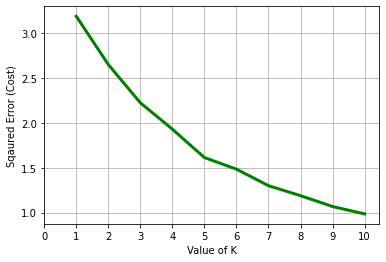

In [33]:

cost =[]
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(toronto_grouped_clustering) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)")
plt.grid(b = True, axis ='both')
plt.xticks(np.arange(0, 11, step=1))
plt.show() # clear the plot

From the above plot we infer that the elbow point occurs at k = 4

Run k-means to cluster the neighborhood into 4 clusters.

In [34]:
# set number of clusters
k = 4

# run k-means clustering
KM = KMeans(n_clusters = k, max_iter = 500) 
KM.fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
KM.labels_[0:10] 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [35]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', KM.labels_)

toronto_merged = toronto_data
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

toronto_merged.head() 

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,2,Coffee Shop,Pub,Park,Bakery,Breakfast Spot,Café,Theater,Wine Shop,Event Space,Performing Arts Venue
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,2,Coffee Shop,Sushi Restaurant,Portuguese Restaurant,Sandwich Place,Distribution Center,Burrito Place,Smoothie Shop,Japanese Restaurant,Italian Restaurant,Beer Bar
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,2,Clothing Store,Coffee Shop,Japanese Restaurant,Cosmetics Shop,Bubble Tea Shop,Italian Restaurant,Middle Eastern Restaurant,Café,Fast Food Restaurant,Diner
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,2,Coffee Shop,Cocktail Bar,Café,Gastropub,American Restaurant,Clothing Store,Italian Restaurant,Gym,Restaurant,Hotel
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,2,Trail,Health Food Store,Pub,Wine Shop,Dance Studio,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run


Finally, let's visualize the resulting clusters

In [36]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster.

In [112]:
import collections
def frequency_dist(cluster):
    df = cluster.iloc[:,2:]
    length = len(df.index)
    new_list = []
    for n in range(0,length):
        arr = df.values[n]
        for i in range(0,9):
            new_list.append(arr[i])
    new_list

    dict = collections.Counter(new_list)

    frqdist = pd.DataFrame.from_dict(dict, orient = 'index', columns = ['Frequency'])

    frqdist['Relative Frequency'] = round((frqdist['Frequency']/(frqdist['Frequency'].sum()))*100, 2)
    frqdist.sort_values('Relative Frequency', ascending = False, inplace = True)#.reset_index(inplace = True)
    print(frqdist)
    frqdist.plot(kind = 'bar', y='Relative Frequency')
    plt.show()    

### Cluster 1

In [110]:
cluster1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster1

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Central Toronto,0,Park,Swim School,Bus Line,Wine Shop,Deli / Bodega,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run


                             Frequency  Relative Frequency
Park                                 1               11.11
Swim School                          1               11.11
Bus Line                             1               11.11
Wine Shop                            1               11.11
Deli / Bodega                        1               11.11
Eastern European Restaurant          1               11.11
Dumpling Restaurant                  1               11.11
Donut Shop                           1               11.11
Doner Restaurant                     1               11.11


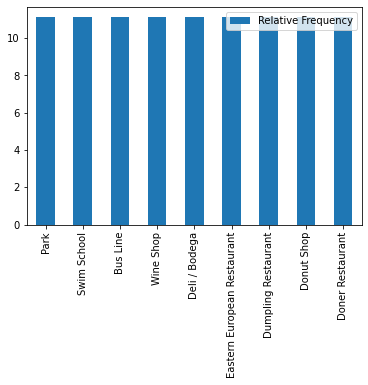

In [113]:
frequency_dist(cluster1)

Cluster 1 maintains a balance in venue categories i.e. it has home service, electronic shop, restaurants and recreational venues.

### Cluster 2

In [115]:
cluster2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster2

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Central Toronto,1,Park,Trail,Jewelry Store,Sushi Restaurant,Wine Shop,Deli / Bodega,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant
33,Downtown Toronto,1,Park,Playground,Trail,Wine Shop,Cupcake Shop,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center


                             Frequency  Relative Frequency
Park                                 2               11.11
Trail                                2               11.11
Wine Shop                            2               11.11
Dumpling Restaurant                  2               11.11
Donut Shop                           2               11.11
Jewelry Store                        1                5.56
Sushi Restaurant                     1                5.56
Deli / Bodega                        1                5.56
Eastern European Restaurant          1                5.56
Playground                           1                5.56
Cupcake Shop                         1                5.56
Doner Restaurant                     1                5.56
Dog Run                              1                5.56


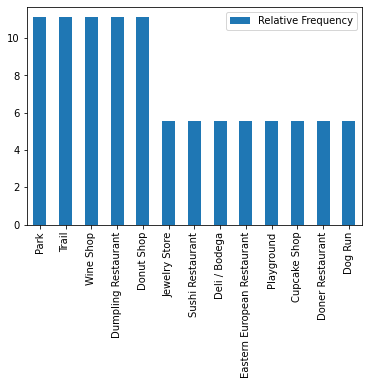

In [116]:
frequency_dist(cluster2)

We notice that all the popular places are restaurants or coffee shops, with coffee shop being the most frequent category. This cluster essentially represents a foodie's delight.

### Cluster 3

In [117]:
cluster3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster3

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,2,Coffee Shop,Pub,Park,Bakery,Breakfast Spot,Café,Theater,Wine Shop,Event Space,Performing Arts Venue
1,Downtown Toronto,2,Coffee Shop,Sushi Restaurant,Portuguese Restaurant,Sandwich Place,Distribution Center,Burrito Place,Smoothie Shop,Japanese Restaurant,Italian Restaurant,Beer Bar
2,Downtown Toronto,2,Clothing Store,Coffee Shop,Japanese Restaurant,Cosmetics Shop,Bubble Tea Shop,Italian Restaurant,Middle Eastern Restaurant,Café,Fast Food Restaurant,Diner
3,Downtown Toronto,2,Coffee Shop,Cocktail Bar,Café,Gastropub,American Restaurant,Clothing Store,Italian Restaurant,Gym,Restaurant,Hotel
4,East Toronto,2,Trail,Health Food Store,Pub,Wine Shop,Dance Studio,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run
5,Downtown Toronto,2,Coffee Shop,Cocktail Bar,Seafood Restaurant,Restaurant,Cheese Shop,Bakery,Farmers Market,Beer Bar,Greek Restaurant,Concert Hall
6,Downtown Toronto,2,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Burger Joint,Bubble Tea Shop,Salad Place,Ramen Restaurant,Business Service,Portuguese Restaurant
7,Downtown Toronto,2,Grocery Store,Café,Park,Italian Restaurant,Baby Store,Candy Store,Restaurant,Coffee Shop,Nightclub,Dog Run
8,Downtown Toronto,2,Coffee Shop,Café,Restaurant,Gym,Clothing Store,Bakery,Thai Restaurant,Deli / Bodega,Sushi Restaurant,Salad Place
9,West Toronto,2,Bakery,Pharmacy,Pet Store,Furniture / Home Store,Bank,Supermarket,Middle Eastern Restaurant,Café,Pool,Music Venue


                               Frequency  Relative Frequency
Coffee Shop                           25                7.94
Café                                  24                7.62
Italian Restaurant                    18                5.71
Restaurant                            17                5.40
Bakery                                10                3.17
Japanese Restaurant                    9                2.86
Pub                                    9                2.86
Bar                                    8                2.54
Hotel                                  7                2.22
Gym                                    6                1.90
Sushi Restaurant                       6                1.90
Sandwich Place                         6                1.90
American Restaurant                    5                1.59
Pizza Place                            5                1.59
Fast Food Restaurant                   5                1.59
Clothing Store          

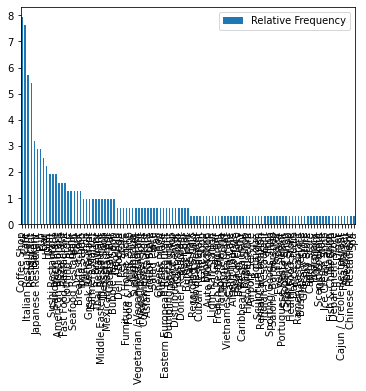

In [118]:
frequency_dist(cluster3)

Cluster 3 has a few recreational centres like park, trail, swim school etc.Further popular restaurants serve eastern cuisine, like dumpling and sushi.

### Cluster 4

In [119]:
cluster4 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Cluster 4 has restaurants, summer camp and dog run. Further Electronic Shop appears as one of the popular spot.

                             Frequency  Relative Frequency
Music Venue                          1               11.11
Garden                               1               11.11
Cupcake Shop                         1               11.11
Eastern European Restaurant          1               11.11
Dumpling Restaurant                  1               11.11
Donut Shop                           1               11.11
Doner Restaurant                     1               11.11
Dog Run                              1               11.11
Distribution Center                  1               11.11


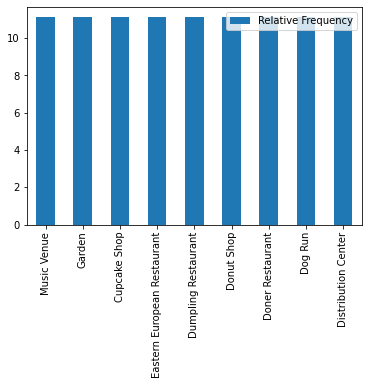

In [120]:
frequency_dist(cluster4)